In [57]:
import pandas as pd
import numpy as np 
from sklearn.impute import SimpleImputer 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, PowerTransformer 
from scipy import stats
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv("Final_Dataset.csv")
df

,Transaction ID,Customer ID,Customer Name,Gender,Age,Location,Product ID,Product Name,Category,Supplier,Quantity Sold,Sale Price,Transaction Date
0,1,474,Customer_14,Female,47,Houston,90,Home Appliances_90,Home Appliances,TechWorld,5,97.97,2024-02-17
1,2,420,Customer_495,Male,57,Chicago,75,Books_75,Clothing,TechWorld,4,762.19,2024-10-02
2,3,73,Customer_359,Male,60,Los Angeles,47,Toys_47,Clothing,HomeEssentials,3,193.05,2024-03-28
3,4,215,Customer_350,Female,36,Chicago,69,Toys_69,Electronics,BookWorm,1,90.13,2024-08-30
4,5,124,Customer_385,Male,65,Los Angeles,99,Clothing_99,Toys,HomeEssentials,4,96.85,2024-02-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,211,Customer_39,Male,20,Houston,74,Clothing_74,Electronics,BookWorm,2,144.94,2024-02-10
9996,9997,60,Customer_261,Male,44,Phoenix,83,Books_83,Books,ToyLand,1,193.98,2024-06-08
9997,9998,498,Customer_143,Female,52,Phoenix,40,Home Appliances_40,Clothing,ToyLand,3,478.80,2024-12-26
9998,9999,422,Customer_188,Male,61,Los Angeles,81,Clothing_81,Home Appliances,HomeEssentials,2,396.30,2024-08-07


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    10000 non-null  int64  
 1   Customer ID       10000 non-null  int64  
 2   Customer Name     10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Location          10000 non-null  object 
 6   Product ID        10000 non-null  int64  
 7   Product Name      10000 non-null  object 
 8   Category          10000 non-null  object 
 9   Supplier          10000 non-null  object 
 10  Quantity Sold     10000 non-null  int64  
 11  Sale Price        10000 non-null  float64
 12  Transaction Date  10000 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 1015.8+ KB


In [60]:
df.describe()

,Transaction ID,Customer ID,Age,Product ID,Quantity Sold,Sale Price
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,249.49850,44.848800,50.396600,3.009900,317.021512
std,2886.89568,144.57867,15.700535,28.756638,1.420072,237.019051
min,1.00000,1.00000,18.000000,1.000000,1.000000,10.020000
25%,2500.75000,124.00000,30.000000,26.000000,2.000000,126.300000
50%,5000.50000,250.00000,47.000000,50.000000,3.000000,255.670000
75%,7500.25000,376.00000,59.000000,75.000000,4.000000,465.015000
max,10000.00000,500.00000,70.000000,100.000000,5.000000,999.380000


In [61]:
missing_values = df.isnull().sum()
print(missing_values)

Transaction ID      0
Customer ID         0
Customer Name       0
Gender              0
Age                 0
Location            0
Product ID          0
Product Name        0
Category            0
Supplier            0
Quantity Sold       0
Sale Price          0
Transaction Date    0
dtype: int64


In [62]:
duplicate_rows = df.duplicated().sum()
print(f'Number of duplicate rows: {duplicate_rows}')

Number of duplicate rows: 0


In [63]:
unique_values = df.nunique()
print(unique_values)

Transaction ID      10000
Customer ID           500
Customer Name         316
Gender                  2
Age                    53
Location                5
Product ID            100
Product Name          100
Category                5
Supplier                5
Quantity Sold           5
Sale Price           9283
Transaction Date      366
dtype: int64


In [64]:
df.head()

,Transaction ID,Customer ID,Customer Name,Gender,Age,Location,Product ID,Product Name,Category,Supplier,Quantity Sold,Sale Price,Transaction Date
0,1,474,Customer_14,Female,47,Houston,90,Home Appliances_90,Home Appliances,TechWorld,5,97.97,2024-02-17
1,2,420,Customer_495,Male,57,Chicago,75,Books_75,Clothing,TechWorld,4,762.19,2024-10-02
2,3,73,Customer_359,Male,60,Los Angeles,47,Toys_47,Clothing,HomeEssentials,3,193.05,2024-03-28
3,4,215,Customer_350,Female,36,Chicago,69,Toys_69,Electronics,BookWorm,1,90.13,2024-08-30
4,5,124,Customer_385,Male,65,Los Angeles,99,Clothing_99,Toys,HomeEssentials,4,96.85,2024-02-03


In [65]:
df.shape

(10000, 13)

In [66]:
df['Date'] = pd.to_datetime(df['Transaction Date'])
df = df.drop('Transaction Date', axis=1)

In [67]:
df

,Transaction ID,Customer ID,Customer Name,Gender,Age,Location,Product ID,Product Name,Category,Supplier,Quantity Sold,Sale Price,Transaction Date,Date
0,1,474,Customer_14,Female,47,Houston,90,Home Appliances_90,Home Appliances,TechWorld,5,97.97,2024-02-17,2024-02-17
1,2,420,Customer_495,Male,57,Chicago,75,Books_75,Clothing,TechWorld,4,762.19,2024-10-02,2024-10-02
2,3,73,Customer_359,Male,60,Los Angeles,47,Toys_47,Clothing,HomeEssentials,3,193.05,2024-03-28,2024-03-28
3,4,215,Customer_350,Female,36,Chicago,69,Toys_69,Electronics,BookWorm,1,90.13,2024-08-30,2024-08-30
4,5,124,Customer_385,Male,65,Los Angeles,99,Clothing_99,Toys,HomeEssentials,4,96.85,2024-02-03,2024-02-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,211,Customer_39,Male,20,Houston,74,Clothing_74,Electronics,BookWorm,2,144.94,2024-02-10,2024-02-10
9996,9997,60,Customer_261,Male,44,Phoenix,83,Books_83,Books,ToyLand,1,193.98,2024-06-08,2024-06-08
9997,9998,498,Customer_143,Female,52,Phoenix,40,Home Appliances_40,Clothing,ToyLand,3,478.80,2024-12-26,2024-12-26
9998,9999,422,Customer_188,Male,61,Los Angeles,81,Clothing_81,Home Appliances,HomeEssentials,2,396.30,2024-08-07,2024-08-07


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  int64         
 1   Customer ID       10000 non-null  int64         
 2   Customer Name     10000 non-null  object        
 3   Gender            10000 non-null  object        
 4   Age               10000 non-null  int64         
 5   Location          10000 non-null  object        
 6   Product ID        10000 non-null  int64         
 7   Product Name      10000 non-null  object        
 8   Category          10000 non-null  object        
 9   Supplier          10000 non-null  object        
 10  Quantity Sold     10000 non-null  int64         
 11  Sale Price        10000 non-null  float64       
 12  Transaction Date  10000 non-null  object        
 13  Date              10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), f

In [69]:
age_bins = [0, 19, 29, 39, 49, 59, 69, 100]
age_labels = [
    'Teens (<20)',
    'Young Adults (20-29)',
    'Adults (30-39)',
    'Middle-Aged (40-49)',
    'Pre-Seniors (50-59)',
    'Seniors (60-69)',
    'Elders (70+)'
]

df['Age Groups'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

In [70]:
df.head()

,Transaction ID,Customer ID,Customer Name,Gender,Age,Location,Product ID,Product Name,Category,Supplier,Quantity Sold,Sale Price,Transaction Date,Date,Age Groups
0,1,474,Customer_14,Female,47,Houston,90,Home Appliances_90,Home Appliances,TechWorld,5,97.97,2024-02-17,2024-02-17,Middle-Aged (40-49)
1,2,420,Customer_495,Male,57,Chicago,75,Books_75,Clothing,TechWorld,4,762.19,2024-10-02,2024-10-02,Pre-Seniors (50-59)
2,3,73,Customer_359,Male,60,Los Angeles,47,Toys_47,Clothing,HomeEssentials,3,193.05,2024-03-28,2024-03-28,Seniors (60-69)
3,4,215,Customer_350,Female,36,Chicago,69,Toys_69,Electronics,BookWorm,1,90.13,2024-08-30,2024-08-30,Adults (30-39)
4,5,124,Customer_385,Male,65,Los Angeles,99,Clothing_99,Toys,HomeEssentials,4,96.85,2024-02-03,2024-02-03,Seniors (60-69)


In [71]:
df['Total Sales'] = df['Quantity Sold'] * df['Sale Price']

In [72]:
df

,Transaction ID,Customer ID,Customer Name,Gender,Age,Location,Product ID,Product Name,Category,Supplier,Quantity Sold,Sale Price,Transaction Date,Date,Age Groups,Total Sales
0,1,474,Customer_14,Female,47,Houston,90,Home Appliances_90,Home Appliances,TechWorld,5,97.97,2024-02-17,2024-02-17,Middle-Aged (40-49),489.85
1,2,420,Customer_495,Male,57,Chicago,75,Books_75,Clothing,TechWorld,4,762.19,2024-10-02,2024-10-02,Pre-Seniors (50-59),3048.76
2,3,73,Customer_359,Male,60,Los Angeles,47,Toys_47,Clothing,HomeEssentials,3,193.05,2024-03-28,2024-03-28,Seniors (60-69),579.15
3,4,215,Customer_350,Female,36,Chicago,69,Toys_69,Electronics,BookWorm,1,90.13,2024-08-30,2024-08-30,Adults (30-39),90.13
4,5,124,Customer_385,Male,65,Los Angeles,99,Clothing_99,Toys,HomeEssentials,4,96.85,2024-02-03,2024-02-03,Seniors (60-69),387.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,211,Customer_39,Male,20,Houston,74,Clothing_74,Electronics,BookWorm,2,144.94,2024-02-10,2024-02-10,Young Adults (20-29),289.88
9996,9997,60,Customer_261,Male,44,Phoenix,83,Books_83,Books,ToyLand,1,193.98,2024-06-08,2024-06-08,Middle-Aged (40-49),193.98
9997,9998,498,Customer_143,Female,52,Phoenix,40,Home Appliances_40,Clothing,ToyLand,3,478.80,2024-12-26,2024-12-26,Pre-Seniors (50-59),1436.40
9998,9999,422,Customer_188,Male,61,Los Angeles,81,Clothing_81,Home Appliances,HomeEssentials,2,396.30,2024-08-07,2024-08-07,Seniors (60-69),792.60


In [73]:
region_revenue = df.groupby('Location')['Total Sales'].sum().reset_index()

category_revenue = df.groupby('Category')['Total Sales'].sum().reset_index()

In [74]:
region_revenue

,Location,Total Sales
0,Chicago,2425902.88
1,Houston,2445330.72
2,Los Angeles,2122323.07
3,New York,2561397.14
4,Phoenix,2118633.04


In [75]:
category_revenue

,Category,Total Sales
0,Books,2144250.71
1,Clothing,2697092.87
2,Electronics,2285715.92
3,Home Appliances,1998835.66
4,Toys,2547691.69


In [76]:
df.round(2)

,Transaction ID,Customer ID,Customer Name,Gender,Age,Location,Product ID,Product Name,Category,Supplier,Quantity Sold,Sale Price,Transaction Date,Date,Age Groups,Total Sales
0,1,474,Customer_14,Female,47,Houston,90,Home Appliances_90,Home Appliances,TechWorld,5,97.97,2024-02-17,2024-02-17,Middle-Aged (40-49),489.85
1,2,420,Customer_495,Male,57,Chicago,75,Books_75,Clothing,TechWorld,4,762.19,2024-10-02,2024-10-02,Pre-Seniors (50-59),3048.76
2,3,73,Customer_359,Male,60,Los Angeles,47,Toys_47,Clothing,HomeEssentials,3,193.05,2024-03-28,2024-03-28,Seniors (60-69),579.15
3,4,215,Customer_350,Female,36,Chicago,69,Toys_69,Electronics,BookWorm,1,90.13,2024-08-30,2024-08-30,Adults (30-39),90.13
4,5,124,Customer_385,Male,65,Los Angeles,99,Clothing_99,Toys,HomeEssentials,4,96.85,2024-02-03,2024-02-03,Seniors (60-69),387.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,211,Customer_39,Male,20,Houston,74,Clothing_74,Electronics,BookWorm,2,144.94,2024-02-10,2024-02-10,Young Adults (20-29),289.88
9996,9997,60,Customer_261,Male,44,Phoenix,83,Books_83,Books,ToyLand,1,193.98,2024-06-08,2024-06-08,Middle-Aged (40-49),193.98
9997,9998,498,Customer_143,Female,52,Phoenix,40,Home Appliances_40,Clothing,ToyLand,3,478.80,2024-12-26,2024-12-26,Pre-Seniors (50-59),1436.40
9998,9999,422,Customer_188,Male,61,Los Angeles,81,Clothing_81,Home Appliances,HomeEssentials,2,396.30,2024-08-07,2024-08-07,Seniors (60-69),792.60


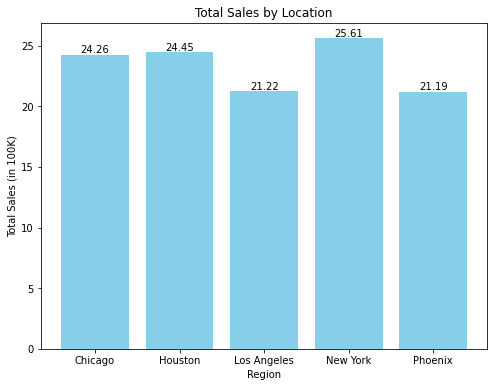

In [77]:
region_revenue['Total Sales'] = region_revenue['Total Sales'] / 100000
category_revenue['Total Sales'] = category_revenue['Total Sales'] / 100000

plt.figure(figsize=(8, 6))
bars = plt.bar(region_revenue['Location'], region_revenue['Total Sales'], color='skyblue')
plt.title('Total Sales by Location')
plt.xlabel('Region')
plt.ylabel('Total Sales (in 100K)')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()

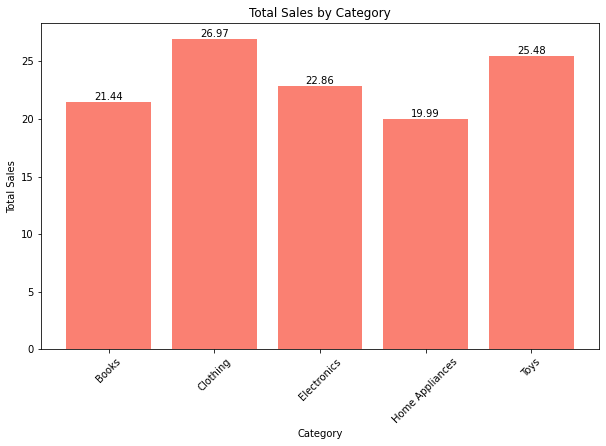

In [78]:
plt.figure(figsize=(10, 6))
bars = plt.bar(category_revenue['Category'], category_revenue['Total Sales'], color='salmon')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()

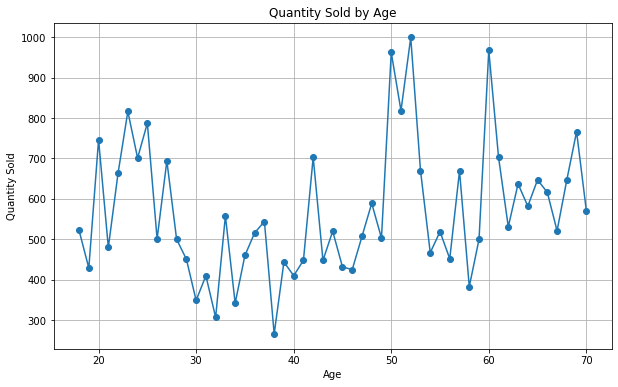

In [79]:
plt.figure(figsize=(10, 6))
df.groupby('Age')['Quantity Sold'].sum().plot(kind='line', marker='o')
plt.title('Quantity Sold by Age')
plt.xlabel('Age')
plt.ylabel('Quantity Sold')
plt.grid(True)
plt.show()

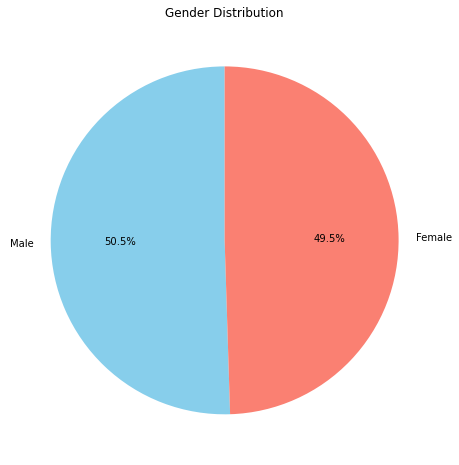

In [80]:
gender_distribution = df['Gender'].value_counts()

plt.figure(figsize=(8, 8))
gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Gender Distribution')
plt.ylabel('')  # 
plt.show()
